# Bank Marketing Data Analysis

## EDA and Model Comparison (Logistic Regression, Decision Tree, Random Forest)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

#Splitting the data and converting it into datframe 
df = pd.read_csv('bank.csv', header=None)
header = df.iloc[0, 0].split(';')
header = [h.strip('"') for h in header]
data = df.iloc[1:, 0].apply(lambda x: [field.strip('"') for field in x.split(';')])
df1 = pd.DataFrame(data.tolist(), columns=header)
df1

In [12]:
#EDA

In [84]:
df1.shape

(41188, 21)

In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41188 non-null  object
 1   job             41188 non-null  object
 2   marital         41188 non-null  object
 3   education       41188 non-null  object
 4   default         41188 non-null  object
 5   housing         41188 non-null  object
 6   loan            41188 non-null  object
 7   contact         41188 non-null  object
 8   month           41188 non-null  object
 9   day_of_week     41188 non-null  object
 10  duration        41188 non-null  object
 11  campaign        41188 non-null  object
 12  pdays           41188 non-null  object
 13  previous        41188 non-null  object
 14  poutcome        41188 non-null  object
 15  emp.var.rate    41188 non-null  object
 16  cons.price.idx  41188 non-null  object
 17  cons.conf.idx   41188 non-null  object
 18  euribo

In [86]:
#datatypeconversion
df1['age'] = df1['age'].astype(int)
df1['duration'] = df1['duration'].astype(int)
df1['campaign'] = df1['campaign'].astype(int)
df1['pdays'] = df1['pdays'].astype(int)
df1['previous'] = df1['previous'].astype(int)
df1['emp.var.rate'] = df1['emp.var.rate'].astype(float)
df1['cons.price.idx'] = df1['cons.price.idx'].astype(float)
df1['cons.conf.idx'] = df1['cons.conf.idx'].astype(float)
df1['euribor3m'] = df1['euribor3m'].astype(float)
df1['nr.employed'] = df1['nr.employed'].astype(float)

In [87]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int32  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int32  
 11  campaign        41188 non-null  int32  
 12  pdays           41188 non-null  int32  
 13  previous        41188 non-null  int32  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [88]:
df1['contact'].isnull().sum()

0

In [89]:
df1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [90]:
df1['contact'] = df1['contact'].replace([float('inf'), float('-inf')], 'Inf')

In [91]:
#Label Endcoding
df1.y = df1.y.map({'no':0, 'yes':1}).astype('int8')

In [92]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['job'] = label_encoder.fit_transform(df1['job'])
df1['marital'] = label_encoder.fit_transform(df1['marital'])
df1['education'] = label_encoder.fit_transform(df1['education'])
df1['contact'] = label_encoder.fit_transform(df1['contact'])
df1.loan = df1.loan.map({'yes': 1, 'unknown': 0, 'no' : 0}).astype('uint8')
df1.housing = df1.housing.map({'yes': 1, 'unknown': 0, 'no' : 0}).astype('uint8')
df1.default = df1.default.map({'no': 1, 'unknown': 0, 'yes': 0}).astype('uint8')
df1.pdays = df1.pdays.replace(999, 0) # replace with 0 if not contact 
df1.previous = df1.previous.apply(lambda x: 1 if x > 0 else 0).astype('uint8')
df1.poutcome = df1.poutcome.map({'nonexistent':0, 'failure':0, 'success':1}).astype('uint8') 

In [93]:
df1['contact'].unique()

array([1, 0])

In [94]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,1,0,0,1,may,mon,...,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,may,mon,...,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,1,1,0,1,may,mon,...,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,1,0,0,1,may,mon,...,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,1,0,1,1,may,mon,...,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,1,1,0,0,nov,fri,...,1,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,1,0,0,0,nov,fri,...,1,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,1,1,0,0,nov,fri,...,2,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,1,0,0,0,nov,fri,...,1,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [95]:
# Checking the correlation
corr=df1.select_dtypes(include=['int32','int64','float64']).corr()
corr.style.background_gradient(cmap='PuBu')

,age,job,marital,education,contact,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.001250,-0.389753,-0.117892,0.007021,-0.000866,0.004594,0.018132,-0.000371,0.000857,0.129372,0.010767,-0.017725
job,0.001250,1.000000,0.027897,0.134121,-0.025132,-0.006490,-0.006923,0.023579,-0.008271,-0.016017,0.052760,-0.007880,-0.019574
marital,-0.389753,0.027897,1.000000,0.109220,-0.054501,0.010290,-0.007240,0.036175,-0.084210,-0.057477,-0.033783,-0.091939,-0.086199
education,-0.117892,0.134121,0.109220,1.000000,-0.105726,-0.015102,0.000371,0.036831,-0.043778,-0.081607,0.078799,-0.036380,-0.041492
contact,0.007021,-0.025132,-0.054501,-0.105726,1.000000,-0.026657,0.077368,-0.098173,0.393584,0.591474,0.251614,0.399773,0.269155
duration,-0.000866,-0.006490,0.010290,-0.015102,-0.026657,1.000000,-0.071699,0.047853,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.006923,-0.007240,0.000371,0.077368,-0.071699,1.000000,-0.041984,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,0.018132,0.023579,0.036175,0.036831,-0.098173,0.047853,-0.041984,1.000000,-0.218942,-0.041787,0.064192,-0.251822,-0.323122
emp.var.rate,-0.000371,-0.008271,-0.084210,-0.043778,0.393584,-0.027968,0.150754,-0.218942,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,-0.016017,-0.057477,-0.081607,0.591474,0.005312,0.127836,-0.041787,0.775334,1.000000,0.058986,0.688230,0.522034


In [96]:
df1.describe()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.72458,1.172769,3.747184,0.791201,0.523842,0.151695,0.365252,258.285010,2.567593,0.221229,0.136569,0.033335,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,3.59456,0.608902,2.136482,0.406455,0.499437,0.358729,0.481507,259.279249,2.770014,1.348874,0.343396,0.179512,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.00000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,102.000000,1.000000,0.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.00000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,180.000000,2.000000,0.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,7.00000,2.000000,6.000000,1.000000,1.000000,0.000000,1.000000,319.000000,3.000000,0.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.00000,3.000000,7.000000,1.000000,1.000000,1.000000,1.000000,4918.000000,56.000000,27.000000,1.000000,1.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


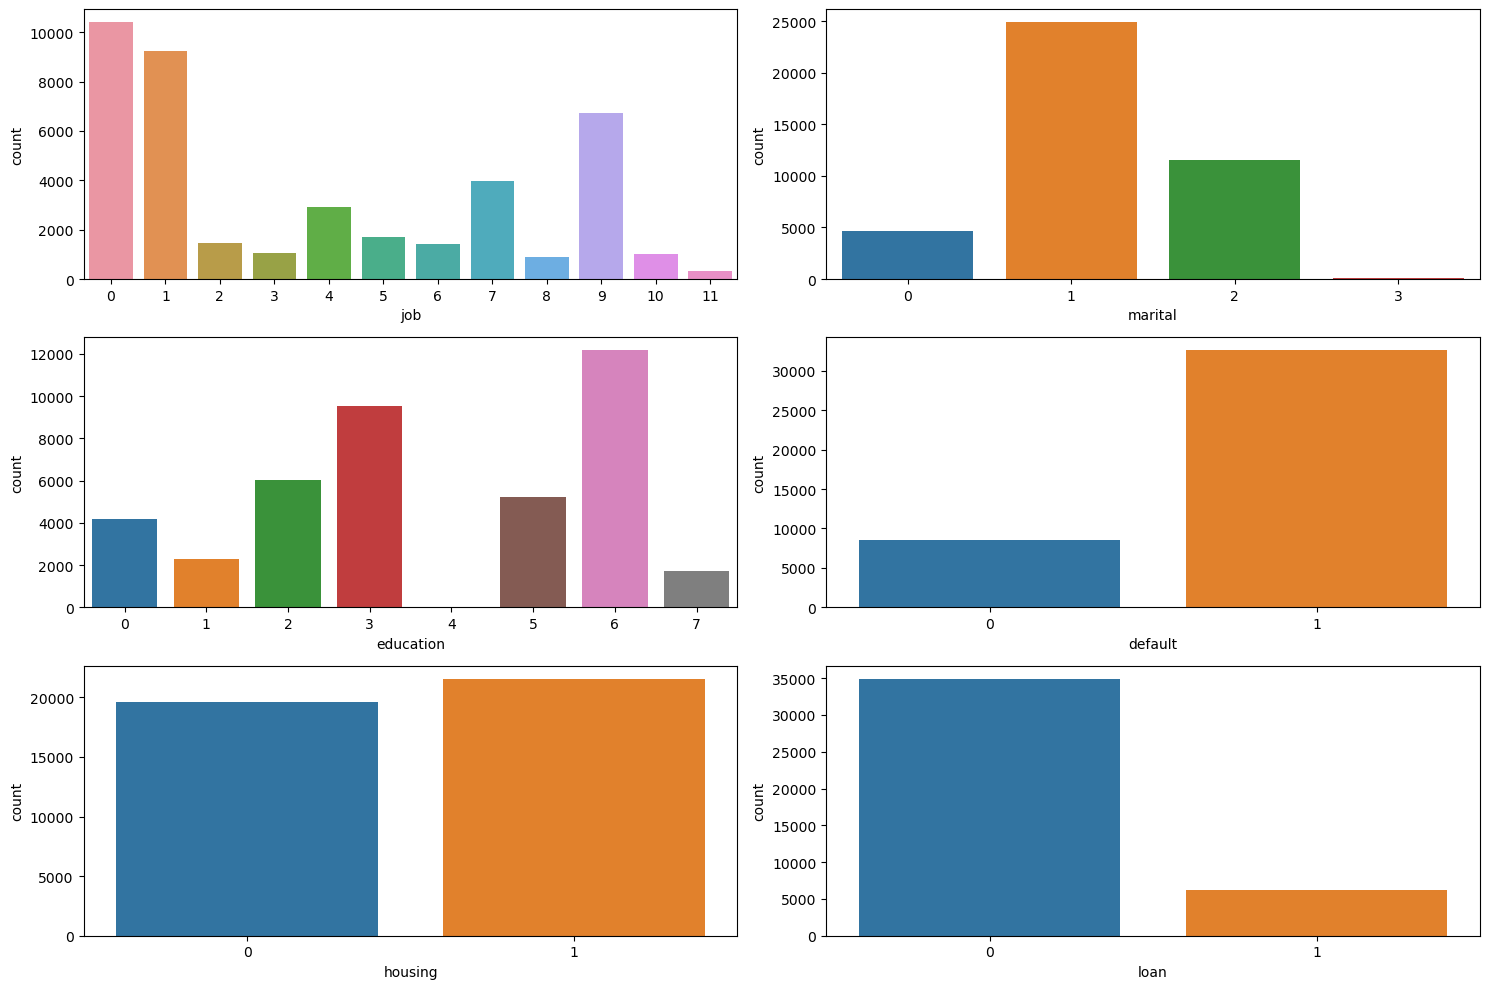

In [97]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
sns.countplot(x='job', data=df1)

plt.subplot(3, 2, 2)
sns.countplot(x='marital', data=df1)

plt.subplot(3, 2, 3)
sns.countplot(x='education', data=df1)

plt.subplot(3, 2, 4)
sns.countplot(x='default', data=df1)

plt.subplot(3, 2, 5)
sns.countplot(x='housing', data=df1)

plt.subplot(3, 2, 6)
sns.countplot(x='loan', data=df1)

plt.tight_layout()
plt.show()

In [76]:
#count with respect to dependent variable

print("\nCross-tabulation between job and y:")
print(pd.crosstab(df1['job'], df1['y']))

print("\nCross-tabulation between marital and y:")
print(pd.crosstab(df1['marital'], df1['y']))

print("\nCross-tabulation between education and y:")
print(pd.crosstab(df1['education'], df1['y']))

print("\nCross-tabulation between default and y:")
print(pd.crosstab(df1['default'], df1['y']))

print("\nCross-tabulation between housing and y:")
print(pd.crosstab(df1['housing'], df1['y']))

print("\nCross-tabulation between loan and y:")
print(pd.crosstab(df1['loan'], df1['y']))


Cross-tabulation between job and y:
y                 0     1
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37

Cross-tabulation between marital and y:
y             0     1
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12

Cross-tabulation between education and y:
y                        0     1
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251

Cross-tabulation between default and y:
y           

In [99]:
#Feature Selection
from sklearn.ensemble import RandomForestClassifier
df1.drop(['month', 'day_of_week'], axis=1, inplace=True)
X = df1.drop('y', axis=1)
y = df1['y']
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
important_features = feature_importances.sort_values(ascending=False).head(10)
print("\nTop 10 important features based on Random Forest:")
important_features


Top 10 important features based on Random Forest:


duration         0.339259
euribor3m        0.124656
age              0.102029
nr.employed      0.072340
job              0.051592
campaign         0.046035
education        0.045641
pdays            0.035549
cons.conf.idx    0.027322
emp.var.rate     0.025107
dtype: float64

In [101]:
#Data Balancing
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("\nClass distribution after SMOTE:")
y_resampled.value_counts()


Class distribution after SMOTE:


y
0    36548
1    36548
Name: count, dtype: int64

In [104]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [105]:
#Model Building - Log. Reg
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_scaled, y)
lr_scores = cross_val_score(lr_model, X_scaled, y, cv=5, scoring='accuracy')
print("\nLogistic Regression Cross-validation Accuracy Scores:")
print(lr_scores)
print(f"Mean accuracy: {lr_scores.mean()}")



Logistic Regression Cross-validation Accuracy Scores:
[0.89317796 0.88431658 0.89366351 0.86633483 0.67354619]
Mean accuracy: 0.842207814542963


In [106]:
#DT
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_scaled, y)
dt_scores = cross_val_score(dt_model, X_scaled, y, cv=5, scoring='accuracy')
print("\nDecision Tree Cross-validation Accuracy Scores:")
print(dt_scores)
print(f"Mean accuracy: {dt_scores.mean()}")




Decision Tree Cross-validation Accuracy Scores:
[0.88905074 0.364773   0.64906531 0.13730727 0.14155639]
Mean accuracy: 0.43635054293915887


In [113]:
#RF
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_scaled, y)
rf_scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='accuracy')
print("\nRandom Forest Cross-validation Accuracy Scores:")
print(rf_scores)
print(f"Mean accuracy: {rf_scores.mean()}")




Random Forest Cross-validation Accuracy Scores:
[0.88856519 0.36683661 0.68062637 0.13852131 0.14228481]
Mean accuracy: 0.44336685618156657


In [115]:
#Parameter Tuning
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

#Logistic Regression model
y_pred_lr = lr_model.predict(X_scaled)
print("\nLogistic Regression Performance Metrics:")
print(f"Accuracy: {accuracy_score(y, y_pred_lr)}")
print("\nClassification Report:")
classification_report(y, y_pred_lr)
print("\nConfusion Matrix:")
confusion_matrix(y, y_pred_lr)

#Decision Tree model
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

print("\nBest Parameters for Decision Tree:")
print(grid_search.best_params_)

#Random Forest model
y_pred_rf = rf_model.predict(X_scaled)
print("\nRandom Forest Performance Metrics:")
print(f"Accuracy: {accuracy_score(y, y_pred_rf)}")
print("\nClassification Report:")
classification_report(y, y_pred_rf)
print("\nConfusion Matrix:")
confusion_matrix(y, y_pred_rf)



Logistic Regression Performance Metrics:
Accuracy: 0.9103865203457318

Classification Report:

Confusion Matrix:

Best Parameters for Decision Tree:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

Random Forest Performance Metrics:
Accuracy: 0.9999757210838108

Classification Report:

Confusion Matrix:


array([[36548,     0],
       [    1,  4639]], dtype=int64)

# Random Forest is the best model for our problem